<a href="https://colab.research.google.com/github/merrymira/bkktrafficdata/blob/main/2_Merge_10months_EDA_FeatureEngineer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning in Automating Traffic Controller at the Congested Intersection in Urban Cities to enhance Traffic Flow


After data pre-processing step, the file is now ready for the next step as follows:
- Translating the road names from Thai to English
- Feature Engineering
- Exploratory Data Analysis (EDA)
  
**Note:** This work belongs to Marisara Satrulee, submitted on 1 June 2024 for the subject: 36123 Research Paper in Autumn 2024. For more information please contact dmarisara@gmail.com.
  
  
  

##Import neccessary libraries and packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# prompt: read filenames from google drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/Data_Research/'

/content/gdrive/My Drive/Data_Research


In [ ]:
!ls

bangkok.geojson		  RoadTranslate.xlsx   Traffic_Transpose
merged_traffic_data.xlsx  Traffic_NoTranspose


##Translate Crossroads and Roads from Thai to English

Read the Thai-English pairs for crossroads and sub-connecting roads as **df_translate**

In [ ]:
# prompt: create dataFrame that contain 'Crossroads' and 'Road' translation from Thai to English
df_translate = pd.read_excel('RoadTranslate.xlsx')

Call df_translate.head()

In [ ]:
df_translate.head()

,RoadThai,Road,Lat_Road,Lon_Road
0,กรุงเกษม,Krung Kasem,13.768721,100.504611
1,กรุงเทพ - นนทบุรี,Bangkok - Nonthaburi,13.833525,100.522041
2,กรุงเทพกรีฑา,Krungthep Kreetha,13.748996,100.651063
3,กรุงเทพกรีฑา-หมู่บ้านนักกีฬาแหลมทอง,Krungthep Kreetha - Laemthong Athletes Village,13.740248,100.684073
4,กรุงธนบุรี,Krung Thon Buri,13.720932,100.502723


Read the merged Excel file as **df**

In [ ]:
df = pd.read_excel('merged_traffic_data.xlsx', index_col=0)

Call df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 1 to 666
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        9540 non-null   object 
 1   Crossroads  9540 non-null   object 
 2   Road        9540 non-null   object 
 3   Total_Vol   9540 non-null   float64
 4   Lat         9540 non-null   float64
 5   Long        9540 non-null   float64
 6   Volume      9539 non-null   float64
 7   CarType     9540 non-null   object 
 8   Start_Hr    9540 non-null   int64  
 9   End_Hr      9540 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 819.8+ KB


Call df.head()

In [ ]:
df.head()

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr
No,,,,,,,,,,
1,2023-02-01 00:00:00,ราชเทวี,พญาไท,52248.0,13.753247,100.531796,7578.0,Car,7,9
2,2023-02-01 00:00:00,ราชเทวี,พญาไท,52248.0,13.753247,100.531796,1372.0,Van,7,9
3,2023-02-01 00:00:00,ราชเทวี,พญาไท,52248.0,13.753247,100.531796,133.0,Bus,7,9
4,2023-02-01 00:00:00,ราชเทวี,พญาไท,52248.0,13.753247,100.531796,3.0,Minibus,7,9
5,2023-02-01 00:00:00,ราชเทวี,พญาไท,52248.0,13.753247,100.531796,43.0,Truck,7,9


Lookup the Thai word in the df_translate and replace by its English translation

In [ ]:
# prompt: if value in df['Crossroads'] match df_translate['Roads Thai'] replace with df_translate['Roads Eng']

# Create a dictionary mapping Thai roads to English roads
translation_dict = dict(zip(df_translate['RoadThai'], df_translate['Road']))

# Replace values in 'Crossroads' column using the translation dictionary
df['Crossroads'] = df['Crossroads'].replace(translation_dict)

# Replace values in 'Road' column using the translation dictionary
df['Road'] = df['Road'].replace(translation_dict)

## Feature Engineering

This project has engineered necessary features for EDA and modelling, such as:
- Time of Day
- Observating Hours
- Traffic Flow
- Road Distance  
- Average Traffic Speed
- Average Traffic Density
- etc.

The missing features are formaulated by the following steps.

###Engineering Features for EDA

Define staring and ending observating hour by breaking the **Time_range** colume into **Start_Hr** and **End_Hr**

In [ ]:
df['Time_range'] = df.apply(lambda x: str(x['Start_Hr']) + '-' + str(x['End_Hr']), axis=1)
df.head()

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr,Time_range
No,,,,,,,,,,,
1,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,7578.0,Car,7,9,7-9
2,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,1372.0,Van,7,9,7-9
3,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,133.0,Bus,7,9,7-9
4,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,3.0,Minibus,7,9,7-9
5,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,43.0,Truck,7,9,7-9


Calculte the hour difference between **Start_Hr** and **End_hr**

In [ ]:
df['Time_Record'] = df.apply(lambda x: int(x['End_Hr']) - int(x['Start_Hr']), axis=1)
df.head()

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr,Time_range,Time_Record
No,,,,,,,,,,,,
1,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,7578.0,Car,7,9,7-9,2
2,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,1372.0,Van,7,9,7-9,2
3,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,133.0,Bus,7,9,7-9,2
4,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,3.0,Minibus,7,9,7-9,2
5,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,43.0,Truck,7,9,7-9,2


Define **Time_of_day**, which is a categorical variable of "Morning", "Afternoon", and "Evening"

In [ ]:
# prompt: df['Time_of_day'] if "7-9": "Morning", "9-17": "Afternoon", "17-19" "Evening"}

# Create a new column 'Time_of_day'
df['Time_of_day'] = df['Time_range'].map({'7-9': 'Morning', '9-17': 'Afternoon', '17-19': 'Evening'})

# Print the updated DataFrame
df.head()

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr,Time_range,Time_Record,Time_of_day
No,,,,,,,,,,,,,
1,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,7578.0,Car,7,9,7-9,2,Morning
2,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,1372.0,Van,7,9,7-9,2,Morning
3,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,133.0,Bus,7,9,7-9,2,Morning
4,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,3.0,Minibus,7,9,7-9,2,Morning
5,2023-02-01 00:00:00,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,43.0,Truck,7,9,7-9,2,Morning


Extract **Day_of_Week** which is a categorical variable of Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, and Sunday.

In [ ]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Now you can use the .dt accessor
df['Day_of_Week'] = df['Date'].dt.day_name()

Extract **Month** which is a categorical variable of 1-12, representing January-December

In [ ]:
df['Month'] = df['Date'].dt.month

Call df.head()

In [ ]:
df.head()

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr,Time_range,Time_Record,Time_of_day,Day_of_Week,Month
No,,,,,,,,,,,,,,,
1,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,7578.0,Car,7,9,7-9,2,Morning,Wednesday,2
2,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,1372.0,Van,7,9,7-9,2,Morning,Wednesday,2
3,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,133.0,Bus,7,9,7-9,2,Morning,Wednesday,2
4,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,3.0,Minibus,7,9,7-9,2,Morning,Wednesday,2
5,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,43.0,Truck,7,9,7-9,2,Morning,Wednesday,2


Date extract day

In [ ]:
# Convert 'Date' column to datetime objects (if it's not already)
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the month
df['Day'] = df['Date'].dt.day

# Print the updated DataFrame with the new 'Day' column
df

,Date,Crossroads,Road,Total_Vol,Lat,Long,Volume,CarType,Start_Hr,End_Hr,Time_range,Time_Record,Time_of_day,Day_of_Week,Month,Day
No,,,,,,,,,,,,,,,,
1,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,7578.0,Car,7,9,7-9,2,Morning,Wednesday,2,1
2,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,1372.0,Van,7,9,7-9,2,Morning,Wednesday,2,1
3,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,133.0,Bus,7,9,7-9,2,Morning,Wednesday,2,1
4,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,3.0,Minibus,7,9,7-9,2,Morning,Wednesday,2,1
5,2023-02-01,Ratchathewi,Phaya Thai,52248.0,13.753247,100.531796,43.0,Truck,7,9,7-9,2,Morning,Wednesday,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2023-04-27,Na Ranong,Ratchadapisek,7945.0,13.717561,100.558105,321.0,Van,17,19,17-19,2,Evening,Thursday,4,27
663,2023-04-27,Na Ranong,Ratchadapisek,7945.0,13.717561,100.558105,9.0,Bus,17,19,17-19,2,Evening,Thursday,4,27
664,2023-04-27,Na Ranong,Ratchadapisek,7945.0,13.717561,100.558105,0.0,Minibus,17,19,17-19,2,Evening,Thursday,4,27


###Engineering Traffic Flow Feature

Traffic Flow is the Traffic Volume (No. of Vehicles)/ Observation Period (Hr)

Calculate the total number of cars, passing a sub-connecting road **"Road"** and name the DataFrame as df_time_of_day

In [ ]:
df_time_of_day = df.groupby(['Date', 'Crossroads', 'Road','Lat', 'Long', 'Time_of_day', 'Time_range', 'Time_Record'])['Volume'].sum().reset_index()

Call df_time_of_day.head()

In [ ]:
df_time_of_day.head()

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Afternoon,9-17,8,9189.0
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Evening,17-19,2,2593.0
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Morning,7-9,2,2175.0
3,2023-01-03,Prannok,Prannok,13.755575,100.47796,Afternoon,9-17,8,13049.0
4,2023-01-03,Prannok,Prannok,13.755575,100.47796,Evening,17-19,2,2934.0


In [ ]:
df_time_of_day['Flow(vec/hr)'] = df_time_of_day['Volume'] / df_time_of_day['Time_Record']
df_time_of_day

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume,Flow(vec/hr)
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Afternoon,9-17,8,9189.0,1148.625
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Evening,17-19,2,2593.0,1296.500
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Morning,7-9,2,2175.0,1087.500
3,2023-01-03,Prannok,Prannok,13.755575,100.477960,Afternoon,9-17,8,13049.0,1631.125
4,2023-01-03,Prannok,Prannok,13.755575,100.477960,Evening,17-19,2,2934.0,1467.000
...,...,...,...,...,...,...,...,...,...,...
1585,2023-10-31,Soi Liabwari 11,Liabwari,13.855384,100.847078,Evening,17-19,2,3671.0,1835.500
1586,2023-10-31,Soi Liabwari 11,Liabwari,13.855384,100.847078,Morning,7-9,2,4318.0,2159.000
1587,2023-10-31,Soi Liabwari 55,Liabwari,13.853070,100.822014,Afternoon,9-17,8,9424.0,1178.000
1588,2023-10-31,Soi Liabwari 55,Liabwari,13.853070,100.822014,Evening,17-19,2,2607.0,1303.500


In [ ]:
# Convert 'Date' column to datetime objects (if it's not already)
df_time_of_day['Date'] = pd.to_datetime(df_time_of_day['Date'])

# Extract the day of the month
df_time_of_day['Day'] = df_time_of_day['Date'].dt.day

# Print the updated DataFrame with the new 'Day' column
df_time_of_day

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume,Flow(vec/hr),Day
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Afternoon,9-17,8,9189.0,1148.625,3
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Evening,17-19,2,2593.0,1296.500,3
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.477960,Morning,7-9,2,2175.0,1087.500,3
3,2023-01-03,Prannok,Prannok,13.755575,100.477960,Afternoon,9-17,8,13049.0,1631.125,3
4,2023-01-03,Prannok,Prannok,13.755575,100.477960,Evening,17-19,2,2934.0,1467.000,3
...,...,...,...,...,...,...,...,...,...,...,...
1585,2023-10-31,Soi Liabwari 11,Liabwari,13.855384,100.847078,Evening,17-19,2,3671.0,1835.500,31
1586,2023-10-31,Soi Liabwari 11,Liabwari,13.855384,100.847078,Morning,7-9,2,4318.0,2159.000,31
1587,2023-10-31,Soi Liabwari 55,Liabwari,13.853070,100.822014,Afternoon,9-17,8,9424.0,1178.000,31
1588,2023-10-31,Soi Liabwari 55,Liabwari,13.853070,100.822014,Evening,17-19,2,2607.0,1303.500,31


Plotting bar chart to see the distribution

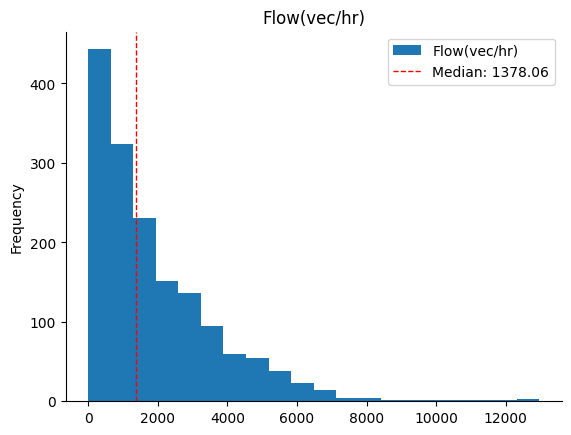

In [ ]:
# Plot the histogram of 'Flow(vec/hr)'
df_time_of_day['Flow(vec/hr)'].plot(kind='hist', bins=20, title='Flow(vec/hr)')

# Add a vertical line for the median
median_flow = df_time_of_day['Flow(vec/hr)'].median()
plt.axvline(median_flow, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_flow:.2f}')

# Hide the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
# prompt: plot  stacked bar chart of Flow_vec_hr by day seperated by Time_of_day sorted by Morning, Afternoon, Evening change color

# # Group data by day and time of day, then sum the flow
df_grouped = df_time_of_day.groupby(['Day', 'Time_of_day'])['Flow(vec/hr)'].sum().unstack()

# Reset the index to access 'Time_of_day' as a column for sorting.
df_grouped = df_grouped.reset_index()

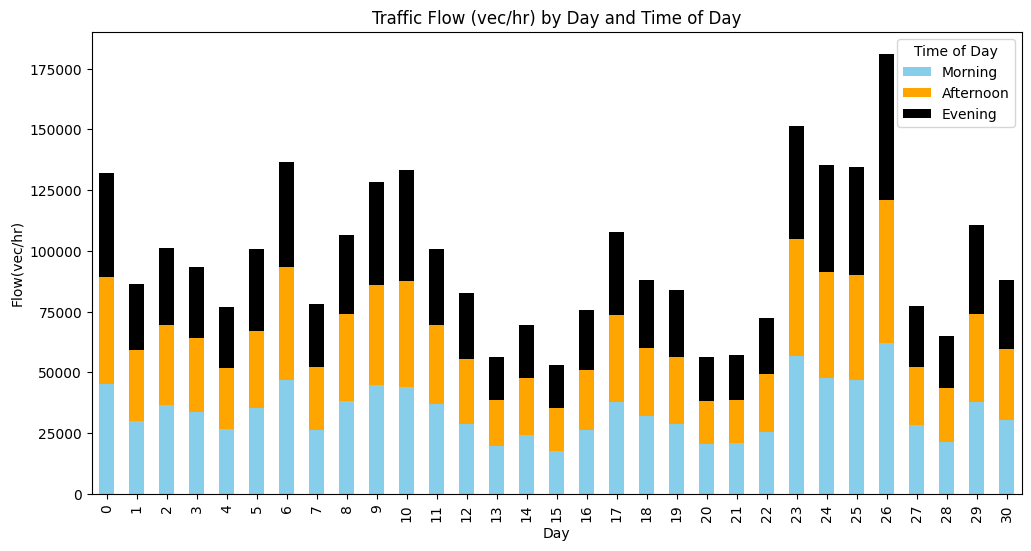

In [ ]:
# prompt: plot stacked bar chart of Flow_vec_hr by day seperated by Time_of_day sorted by Morning, Afternoon, Evening change color

# Group data by day and time of day, then sum the flow
df_grouped = df_time_of_day.groupby(['Day', 'Time_of_day'])['Flow(vec/hr)'].sum().unstack()

# Reset the index to access 'Time_of_day' as a column for sorting.
df_grouped = df_grouped.reset_index()

# Sort the DataFrame by the 'Time_of_day' level of the columns
df_grouped = df_grouped[['Morning', 'Afternoon', 'Evening']]  # Reorder columns


# Plot the stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange', 'black'])

# Set labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Flow(vec/hr)')
ax.set_title('Traffic Flow (vec/hr) by Day and Time of Day')

# Add legend
ax.legend(title='Time of Day')

# Rotate x-axis labels for better readability
plt.xticks()

# Display the chart
plt.show()

Boxplot Statistics for Morning:
  Median: 1470.75
  Q1: 611.625
  Q3: 2909.125
  IQR: 2297.5
  Min: 0.5
  Max: 12796.5
--------------------
Boxplot Statistics for Afternoon:
  Median: 1348.375
  Q1: 552.5625
  Q3: 2737.21875
  IQR: 2184.65625
  Min: 1.0
  Max: 12656.875
--------------------
Boxplot Statistics for Evening:
  Median: 1316.75
  Q1: 527.5
  Q3: 2734.875
  IQR: 2207.375
  Min: 0.0
  Max: 12959.0
--------------------


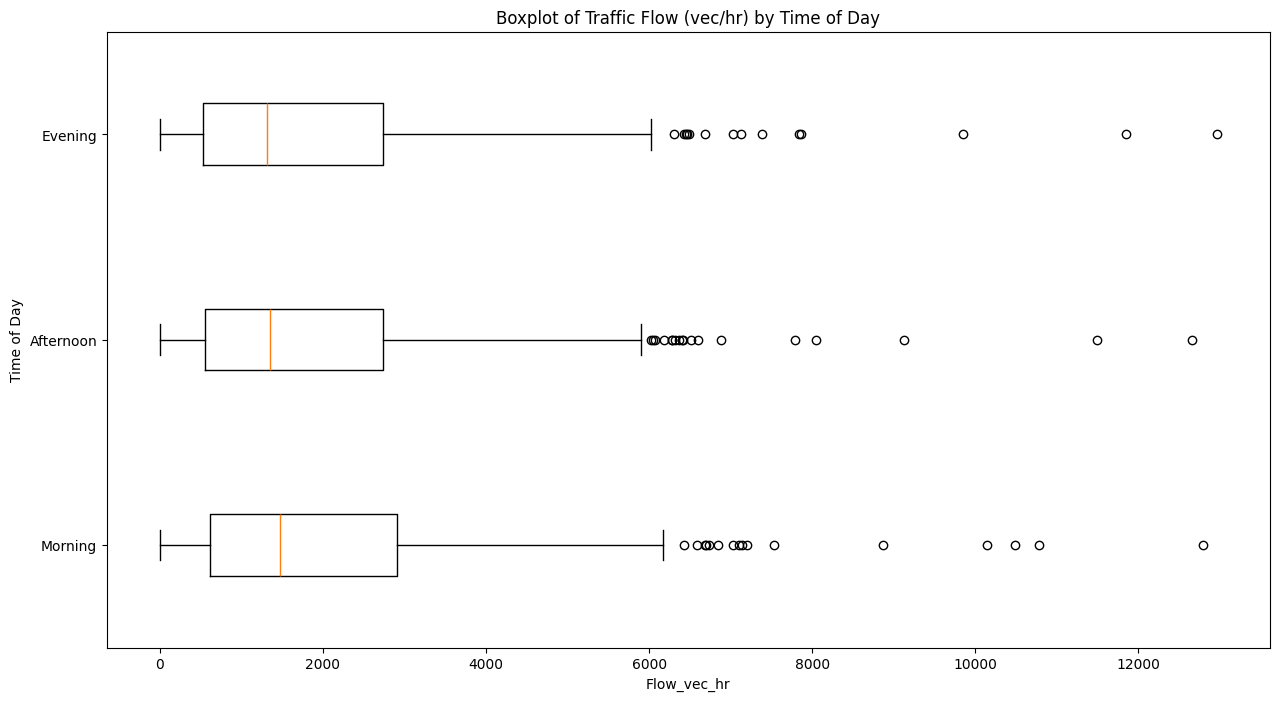

In [ ]:
# prompt: print boxplot stats

# Create a boxplot of Flow_vec_hr separated by Time_of_day horizontally
plt.figure(figsize=(15, 8))
plt.boxplot([df_time_of_day[df_time_of_day['Time_of_day'] == 'Morning']['Flow(vec/hr)'],
             df_time_of_day[df_time_of_day['Time_of_day'] == 'Afternoon']['Flow(vec/hr)'],
             df_time_of_day[df_time_of_day['Time_of_day'] == 'Evening']['Flow(vec/hr)']],
            labels=['Morning', 'Afternoon', 'Evening'], vert=False)
plt.xlabel('Flow_vec_hr')
plt.ylabel('Time of Day')
plt.title('Boxplot of Traffic Flow (vec/hr) by Time of Day')

# Calculate and print boxplot statistics
for time_of_day in ['Morning', 'Afternoon', 'Evening']:
  data = df_time_of_day[df_time_of_day['Time_of_day'] == time_of_day]['Flow(vec/hr)']
  median = data.median()
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  min_val = data.min()
  max_val = data.max()
  print(f"Boxplot Statistics for {time_of_day}:")
  print(f"  Median: {median}")
  print(f"  Q1: {q1}")
  print(f"  Q3: {q3}")
  print(f"  IQR: {iqr}")
  print(f"  Min: {min_val}")
  print(f"  Max: {max_val}")
  print("-" * 20)

plt.show()

###Continue with EDA

Plotting a bar chart to identify **top 20** congested crossroads

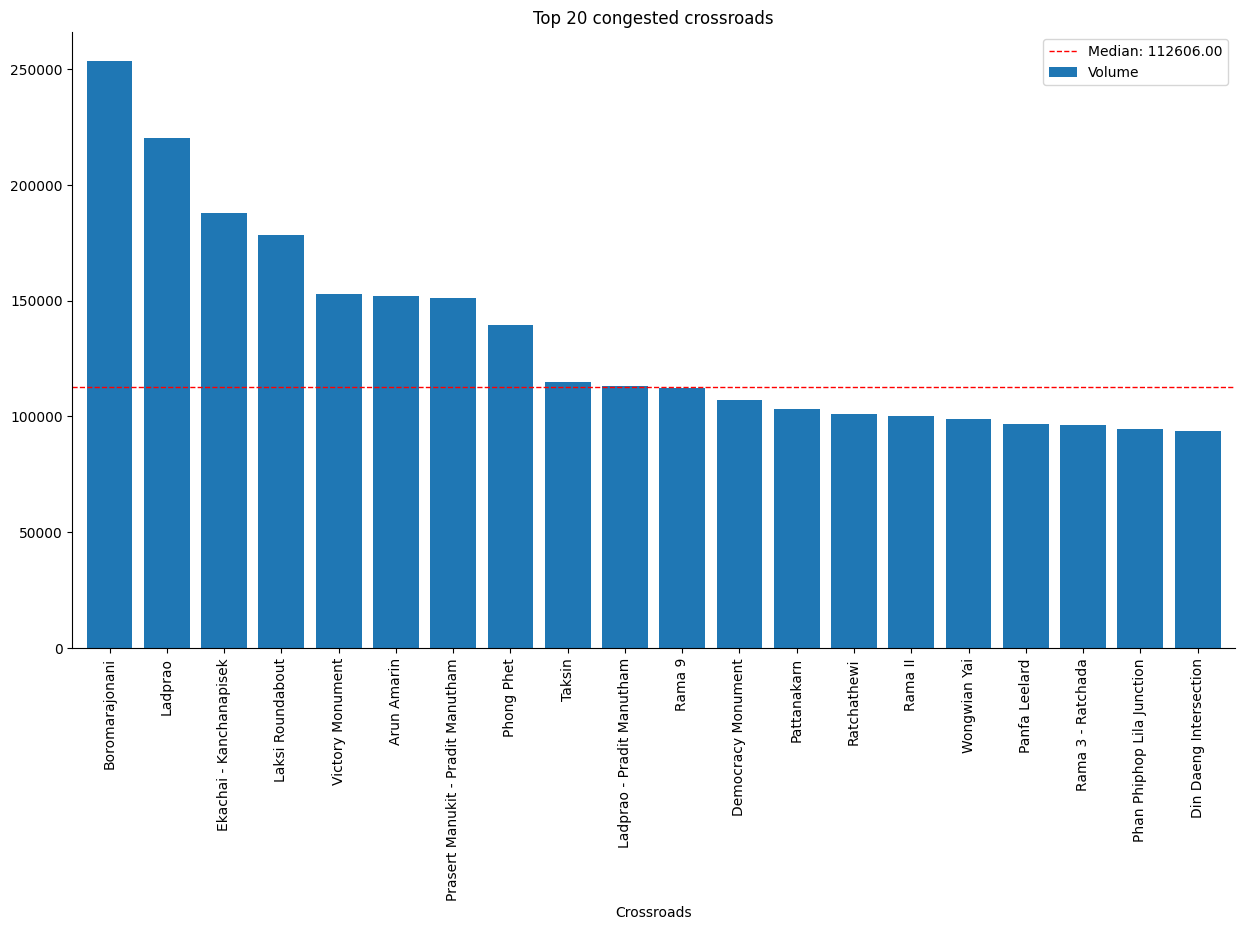

In [ ]:
# Get the top 20 Crossroads by sum of Volume
top_20_crossroads = df_time_of_day.groupby('Crossroads')['Volume'].sum().reset_index().sort_values(by='Volume', ascending=False).head(20)

# Create a bar chart of the top 20 Crossroads with increased figsize
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust figsize as needed
top_20_crossroads.plot(x='Crossroads', y='Volume', kind='bar', ax=ax, title='Top 20 congested crossroads', width=0.8)  # Adjust width

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a horizontal line for the median
median_volume = top_20_crossroads['Volume'].median()
plt.axhline(median_volume, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_volume:.2f}')

# Add legend
plt.legend()

# Show plot
plt.show()


Print out the names

In [ ]:
top_20 = top_20_crossroads['Crossroads'].tolist()
top_20

['Boromarajonani',
 'Ladprao',
 'Ekachai - Kanchanapisek',
 'Laksi Roundabout',
 'Victory Monument',
 'Arun Amarin',
 'Prasert Manukit - Pradit Manutham',
 'Phong Phet',
 'Taksin',
 'Ladprao - Pradit Manutham',
 'Rama 9',
 'Democracy Monument',
 'Pattanakarn',
 'Ratchathewi',
 'Rama II',
 'Wongwian Yai',
 'Panfa Leelard',
 'Rama 3 - Ratchada',
 'Phan Phiphop Lila Junction',
 'Din Daeng Intersection']

Plotting a stacked bar chart to identify **top 20** congested crossroads, separated by car types

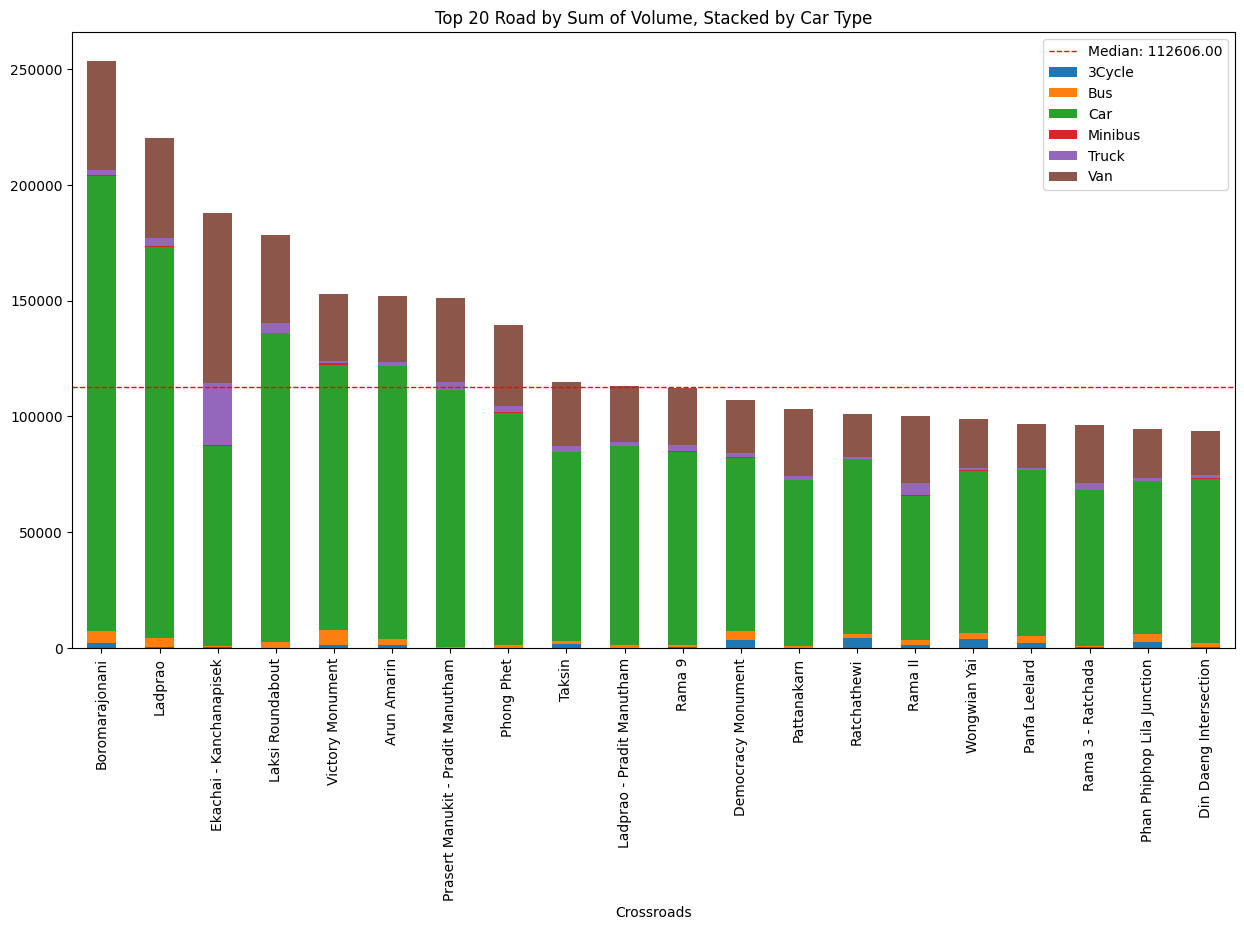

In [ ]:
# prompt: from df sum Volume groupby Crossroads and plot top_20 stack bar chart by CarType and sort descending
top_20_crossroads_by_car_type = df[df['Crossroads'].isin(top_20)]

# Group the data by 'Crossroads' and 'CarType' and sum the 'Volume'
top_20_crossroads_by_car_type = top_20_crossroads_by_car_type.groupby(['Crossroads', 'CarType'])['Volume'].sum().reset_index()

# Sort the data by 'Crossroads' in the custom order
top_20_crossroads_by_car_type['Crossroads'] = pd.Categorical(top_20_crossroads_by_car_type['Crossroads'], categories=top_20, ordered=True)
top_20_crossroads_by_car_type = top_20_crossroads_by_car_type.sort_values(by='Crossroads')

# Create a stacked bar chart
top_20_crossroads_by_car_type.pivot_table(index='Crossroads', columns='CarType', values='Volume').plot(kind='bar', stacked=True, figsize=(15, 8))

# Add a horizontal line for the median
median_volume = top_20_crossroads['Volume'].median()
plt.axhline(median_volume, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_volume:.2f}')

# Rotate the x-axis labels by 70 degrees
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Top 20 Road by Sum of Volume, Stacked by Car Type')

plt.legend()

# Show the plot
plt.show()

Plotting a stack bar chart, separated by **Day_of_week**

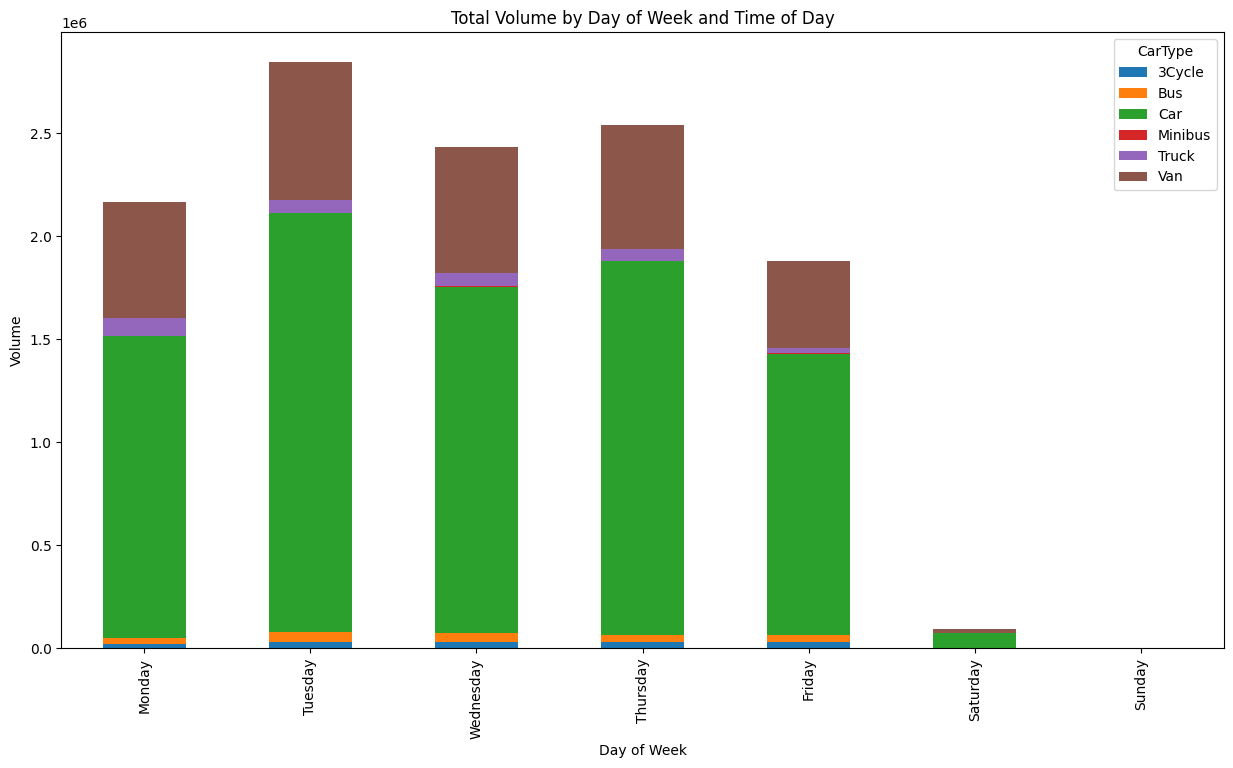

In [ ]:
# prompt: sum volume to plot which Day_of_Week has the most Volume bar stack by CarType sort by Monday Tuesday to Sunday

df_grouped = df.groupby(['Day_of_Week', 'CarType'])['Volume'].sum().reset_index()

# Create a pivot table with 'Day_of_Week' as the index, 'CarType' as the columns, and 'Volume' as the values
pivot_table = df_grouped.pivot(index='Day_of_Week', columns='CarType', values='Volume')

# Sort the index of the pivot table to ensure the days are in order from Monday to Sunday
pivot_table = pivot_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a stacked bar chart of the pivot table with adjusted figsize
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 8))

# Set the title of the chart
plt.title('Total Volume by Day of Week and Time of Day')

# Set the x-axis label
plt.xlabel('Day of Week')

# Set the y-axis label
plt.ylabel('Volume')

# Display the chart
plt.show()

Plotting a stack bar chart, separated by **Month**

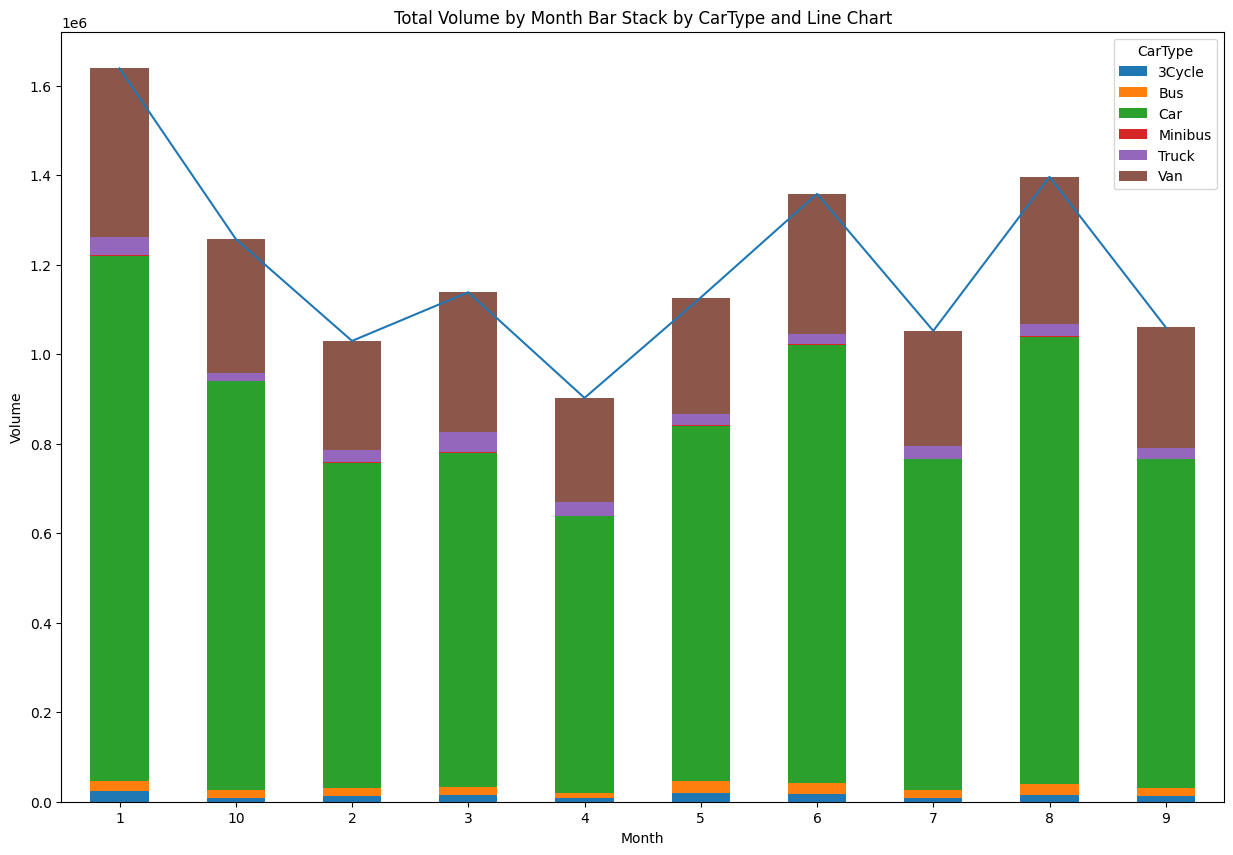

In [ ]:
# prompt: plot total Volume by Month bar chart stack CarType and line chart

# Group the data by 'Month' and 'CarType' and sum the 'Volume' column
# Convert 'Month' to string before grouping to avoid datetime64 error
df_grouped = df.groupby([df['Month'].astype(str), 'CarType'])['Volume'].sum().reset_index()

# Create a pivot table with 'Month' as the index, 'CarType' as the columns, and 'Volume' as the values
pivot_table = df_grouped.pivot(index='Month', columns='CarType', values='Volume')

# Create a stacked bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 10))

# Create a line chart of the total volume by month
# Convert 'Month' to string here as well for consistency
df.groupby(df['Month'].astype(str))['Volume'].sum().plot(kind='line')

# Set the title of the plot
plt.title('Total Volume by Month Bar Stack by CarType and Line Chart')

# Set the x-axis label
plt.xlabel('Month')

# Set the y-axis label
plt.ylabel('Volume')

# Display the chart
plt.show()

###Engineering Distance Feature

Calculating the Traffic Density by dividing traffic volume by the distance a road between two intersections, since the original dataset doesn't contain this information. This project calcuate the distance between the latitude-longitude coordinates of the **Crossroads** and **Sub-connecting Roads**

Merge the latitude and longitude of **Road** from **df_translate** with the main DataFrame, **df**

In [ ]:
df_coor = df_time_of_day.copy()

In [ ]:
df_coor = pd.merge(df_coor, df_translate[['Road', 'Lat_Road', 'Lon_Road']], on='Road', how='left')

df.head() to check the DataFrame after merging

In [ ]:
df_coor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1590 non-null   datetime64[ns]
 1   Crossroads    1590 non-null   object        
 2   Road          1590 non-null   object        
 3   Lat           1590 non-null   float64       
 4   Long          1590 non-null   float64       
 5   Time_of_day   1590 non-null   object        
 6   Time_range    1590 non-null   object        
 7   Time_Record   1590 non-null   int64         
 8   Volume        1590 non-null   float64       
 9   Flow(vec/hr)  1590 non-null   float64       
 10  Day           1590 non-null   int32         
 11  Lat_Road      1590 non-null   float64       
 12  Lon_Road      1590 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(4)
memory usage: 155.4+ KB


Create a function called **calculate_distance**, using Haversine Formula to calcuate the distance in kilometers between two latitude-longitude coordinates.

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Radius of the Earth in kilometers
    R = 6371.0

    # Differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return distance

# Assuming 'Lat', 'Long', 'Lat_Road', and 'Lon_Road' are columns in your DataFrame
df_coor['Distance'] = df_coor.apply(
    lambda row: calculate_distance(row['Lat'], row['Long'], row['Lat_Road'], row['Lon_Road']), axis=1)


In [ ]:
# prompt: sum volume by Date Crossroads

# Group the data by 'Date' and 'Crossroads' and sum the 'Volume' column
df_sum = df_coor.groupby(['Crossroads', 'Lat', 'Long'])['Volume'].sum().reset_index()

# Print the resulting DataFrame
df_sum.head()

,Crossroads,Lat,Long,Volume
0,Along Phasi Charoen Canal North - Phetkasem 81,13.681103,100.344529,27761.0
1,Along Phasi Charoen South Canal - Phetkasem 69,13.688782,100.382079,14368.0
2,Along the Southern Railway - Chimphli,13.779394,100.452021,18085.0
3,Along the Southern Railway - Erawan Park Avenue,13.772845,100.460214,10974.0
4,Along the Southern Railway - Erawan Park Avenue,13.772847,100.460214,10268.0


##Continue with EDA

In [ ]:
# Import necessary libraries
import plotly.express as px
import json

**GeoJSON** is an open standard format designed for encoding a variety of geographic data structures.
```
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```

This study uses "bangkok.geojson" to plot the traffic volume of each crossroad.

In [ ]:
# Load the GeoJSON file for Bangkok
with open("bangkok.geojson", "r") as f:
    bangkok_geojson = json.load(f)

# Plot the data on the Bangkok map
fig = px.choropleth_mapbox(df_sum, geojson=bangkok_geojson, locations=df_sum['Volume'], color='Volume',
                            featureidkey="properties.NAME_EN",
                            color_continuous_scale="Jet",
                            mapbox_style="carto-positron",
                            zoom=10.5, center={"lat": 13.7563, "lon": 100.5018},
                            opacity=0.5,
                            labels={'Volume':'Volume'})

# Add scatter plot for Volume data with color varying by Volume
fig.add_scattermapbox(lat=df_sum['Lat'], lon=df_sum['Long'], mode='markers',
                      marker=dict(size=10, color=df_sum['Volume'], opacity=0.95,
                                  colorscale='RdYlGn'),
                      hovertext=df_sum['Crossroads'])

# Resize the figure
fig.update_layout(height=600, width=1200)  # Adjust the height and width as needed

fig.show()

Plotting histogram to show the road lenght. In this study, the median road distance between two intersections is 1.26 km and the mean is 3.53 km.

In [ ]:
unique_values = df_coor[['Road', 'Distance']].drop_duplicates()

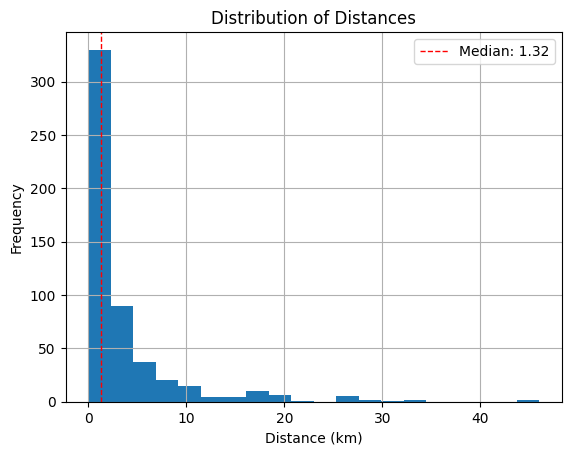

In [ ]:
# prompt: plot unique_values hisplot

# Create a histogram of the 'Distance' column
unique_values['Distance'].hist(bins=20)

# Add a vertical line for the median
median_distance = unique_values['Distance'].median()
plt.axvline(median_distance, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_distance:.2f}')

# Set legend
plt.legend()

# Set the title of the plot
plt.title('Distribution of Distances')

# Set the x-axis label
plt.xlabel('Distance (km)')

# Set the y-axis label
plt.ylabel('Frequency')

# Display the plot
plt.show()


The mean of road distance (km)

In [ ]:
unique_values['Distance'].mean()

3.511757999194696

In [ ]:
# Ensure LOS_dict
LOS_dict = {
    'LOS_B': {'speed_min': 91.7324, 'speed_max': 96.5604, 'density_min': 7.4565, 'density_max': 12.4275, 'mspeed': 0.01082, 'bspeed': 84.9084, 'mdensity': 0.0124, 'bdensity': -1.24175},
    'LOS_C': {'speed_min': 86.9044, 'speed_max': 91.7324, 'density_min': 12.4275, 'density_max': 18.6412, 'mspeed': -0.0107, 'bspeed': 103.5354, 'mdensity': 0.0138, 'bdensity': -2.7603221},
    'LOS_D': {'speed_min': 74.0296, 'speed_max': 86.9044, 'density_min': 18.6412, 'density_max': 26.0977, 'mspeed': 0.0429, 'bspeed': 7.554775, 'mdensity': 0.0249, 'bdensity': -19.90805},
    'LOS_E': {'speed_min': 48.2802, 'speed_max': 74.0296, 'density_min': 26.0977, 'density_max': 41.632, 'mspeed': 0.1717, 'bspeed': -269.601477, 'mdensity': 0.1036, 'bdensity': -165.40}
}

In [ ]:
# FLOW_dict
FLOW_dict = {
    'LOS_B': {'min': 700.0, 'max': 1100.0},
    'LOS_C': {'min': 1100.0, 'max': 1550.0},
    'LOS_D': {'min': 1550.0, 'max': 1850.0},
    'LOS_E': {'min': 1850.0, 'max': 2000.0}
}

In [ ]:
def calculate_los(flow):
    flow = float(flow)

    # Initialize default values
    los, avg_speed, avg_density = None, None, None

    # Handle extreme cases first
    if flow > 2000.0:
        print(f"Flow {flow} is above 2000. Returning 'LOS_F'")
        print("\n")
        return 'LOS_F', LOS_dict['LOS_E']['speed_min'], LOS_dict['LOS_E']['density_min']
    elif flow < 700.0:
        print(f"Flow {flow} is below 700. Returning 'LOS_A'")
        print("\n")
        return 'LOS_A', LOS_dict['LOS_B']['speed_max'], LOS_dict['LOS_B']['density_max']

    # Iterate through FLOW_dict to find matching LOS range
    for los_key, flow_range in FLOW_dict.items():
        if flow_range['min'] <= flow <= flow_range['max']:
            print(f"Flow {flow} falls into range for {los_key}: {flow_range}")

            # Get LOS parameters
            los_params = LOS_dict.get(los_key, {})
            if los_params:
                # Calculate speed and density
                speed = los_params['mspeed'] * flow + los_params['bspeed']
                density = los_params['mdensity'] * flow + los_params['bdensity']

                # Validate speed and density with a small tolerance
                tolerance = 0.01  # Adjust as needed
                if (los_params['speed_min'] - tolerance <= speed <= los_params['speed_max'] + tolerance) and \
                   (los_params['density_min'] - tolerance <= density <= los_params['density_max'] + tolerance):

                    # Log calculations
                    print(f"Calculated Speed: {speed}, Density: {density} for LOS: {los_key}")
                    print(f"Expected Speed Range: {los_params['speed_min']} - {los_params['speed_max']}")
                    print(f"Expected Density Range: {los_params['density_min']} - {los_params['density_max']}")
                    print("\n")
                    avg_speed = speed
                    avg_density = density
                    los = los_key
                    break
                else:
                    avg_speed = los_params['speed_max']
                    avg_density = los_params['density_max']
                    los = los_key

    # Return the results
    return los, avg_speed, avg_density

In [ ]:
# prompt: df_time_of_day add 3 new columns 'LOS', 'Avg. Traffic Speed', 'Avg' Traffic Density' by applying the function calculate_los(Flow(vec/hr))

results = df_coor['Flow(vec/hr)'].apply(calculate_los)

Streaming output truncated to the last 5000 lines.

Flow 209.0 is below 700. Returning 'LOS_A'


Flow 2425.125 is above 2000. Returning 'LOS_F'


Flow 1793.0 falls into range for LOS_D: {'min': 1550.0, 'max': 1850.0}
Calculated Speed: 84.47447500000001, Density: 24.73765 for LOS: LOS_D
Expected Speed Range: 74.0296 - 86.9044
Expected Density Range: 18.6412 - 26.0977


Flow 2400.0 is above 2000. Returning 'LOS_F'


Flow 2478.0 is above 2000. Returning 'LOS_F'


Flow 2443.0 is above 2000. Returning 'LOS_F'


Flow 2392.0 is above 2000. Returning 'LOS_F'


Flow 1223.5 falls into range for LOS_C: {'min': 1100.0, 'max': 1550.0}
Calculated Speed: 90.44395, Density: 14.1239779 for LOS: LOS_C
Expected Speed Range: 86.9044 - 91.7324
Expected Density Range: 12.4275 - 18.6412


Flow 1180.5 falls into range for LOS_C: {'min': 1100.0, 'max': 1550.0}
Calculated Speed: 90.90405, Density: 13.5305779 for LOS: LOS_C
Expected Speed Range: 86.9044 - 91.7324
Expected Density Range: 12.4275 - 18.6412


Flow 

In [ ]:
df_coor['LOS'], df_coor['Avg. Traffic Speed'], df_coor['Avg Traffic Density'] = zip(*results)

In [ ]:
df_coor.head()

,Date,Crossroads,Road,Lat,Long,Time_of_day,Time_range,Time_Record,Volume,Flow(vec/hr),Day,Lat_Road,Lon_Road,Distance,LOS,Avg. Traffic Speed,Avg Traffic Density
0,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Afternoon,9-17,8,9189.0,1148.625,3,13.738327,100.485702,2.092193,LOS_C,91.245112,13.090703
1,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Evening,17-19,2,2593.0,1296.500,3,13.738327,100.485702,2.092193,LOS_C,89.662850,15.131378
2,2023-01-03,Prannok,Itsaraphap,13.755575,100.47796,Morning,7-9,2,2175.0,1087.500,3,13.738327,100.485702,2.092193,LOS_B,96.560400,12.427500
3,2023-01-03,Prannok,Prannok,13.755575,100.47796,Afternoon,9-17,8,13049.0,1631.125,3,13.756310,100.486873,0.966152,LOS_D,77.530038,20.706962
4,2023-01-03,Prannok,Prannok,13.755575,100.47796,Evening,17-19,2,2934.0,1467.000,3,13.756310,100.486873,0.966152,LOS_C,87.838500,17.484278


Save **df_coor** to data_Features_Engineer.csv

In [ ]:
df_coor.to_csv("/content/gdrive/My Drive/Data_Research/data_Features_Engineer.csv")

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_coor)

https://docs.google.com/spreadsheets/d/18_yi5cQ31Y0wQgBzwRcqWBkYTbQgX7ThFX3Q_7_W_48#gid=0
